In [1]:
library(sitePath)
library(ggplot2)
suppressPackageStartupMessages(library(ggtree))

OUTPUT_DIR <- file.path("Output", "Method")
TREE_HEIGHT_RATIO <- 1.5

if (dir.exists(OUTPUT_DIR)) {
    unlink(OUTPUT_DIR, recursive = TRUE)
}
dir.create(OUTPUT_DIR, showWarnings = FALSE)

In [2]:
plotPathsComparison <- function(paths, select1, select2, pathSize = NULL, branchSize = 1) {
    if (is.null(pathSize)) {
        pathSize <- 6
    }
    
    pathNodes <- unique(unlist(paths[c(select1, select2)]))

    group <- rep(1, times = nNodes)
    group[pathNodes] <- 0
    group <- factor(group)

    groupColors <- rep(2, times = nNodes)
    groupColors[pathNodes] <- 1
    groupColors[unlist(paths[select1])] <- 0
    groupColors <- factor(groupColors)

    size <- rep(1, times = nNodes)
    size[pathNodes] <- 2

    p <- ggtree(tree, aes(color=groupColors, linetype=group, size=size)) + 
        scale_size(range=c(branchSize, pathSize)) +
        scale_color_manual(values = c("red", "blue", "gainsboro")) + 
        theme(legend.position = "none")
    p
}

plotSubPaths <- function(paths, select = NULL, pathColor = "blue", pathSize = 2, branchSize = 1) {
    tree <- as.phylo(paths)
    if (is.null(select)) {
        pathNodes <- unique(unlist(paths))
    } else {
        pathNodes <- unique(unlist(paths[select]))
    }
    group <- rep(1, times = nNodes)
    group[pathNodes] <- 0
    group <- factor(group)
    size <- rep(1, times = nNodes)
    size[pathNodes] <- 2
    p <- ggtree(tree, aes(color=group, linetype=group, size=size)) + 
        scale_size(range=c(branchSize, pathSize)) +
        scale_color_manual(values = c(pathColor, "gainsboro")) + 
        theme(legend.position = "none")
    p
}

In [3]:
data(h3n2_align)
data(h3n2_tree)

paths <- addMSA(h3n2_tree, alignment = h3n2_align)
tree <- as.phylo(paths)
nNodes <- ape::Nnode(tree, internal.only = FALSE)

The "tree" object is not bifurcated and resolved by "multi2di" function.



In [4]:
paths <- lineagePath(paths, 0.04)
paths

This is a 'lineagePath' object.

5 lineage paths using 75.6 as "major SNP" threshold 

In [5]:
minEntropy <- sitesMinEntropy(paths)

In [6]:
mutations <- fixationSites(minEntropy)

In [7]:
paraSites <- parallelSites(minEntropy, minSNP = 10, mutMode = "exact")

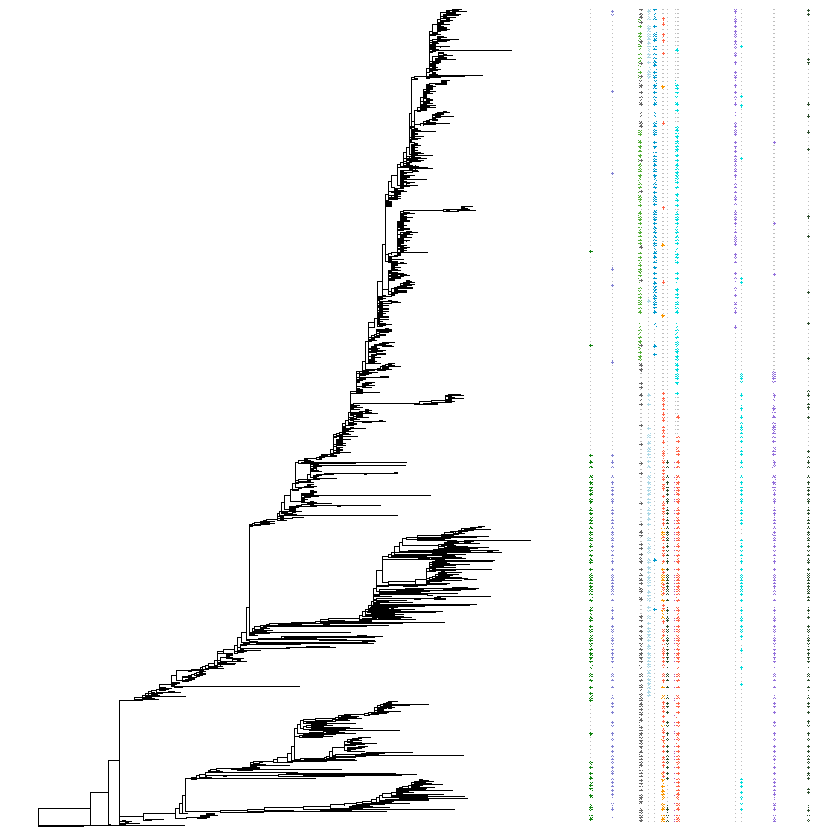

In [8]:
snp <- SNPsites(paths, minSNP = 600)
p <- plotMutSites(snp)
p

ggsave(
    filename = file.path(OUTPUT_DIR, "sparseMutations.svg"),
    plot = p, 
    device = "svg",
    width = 4.5,
    height = 4.5
)

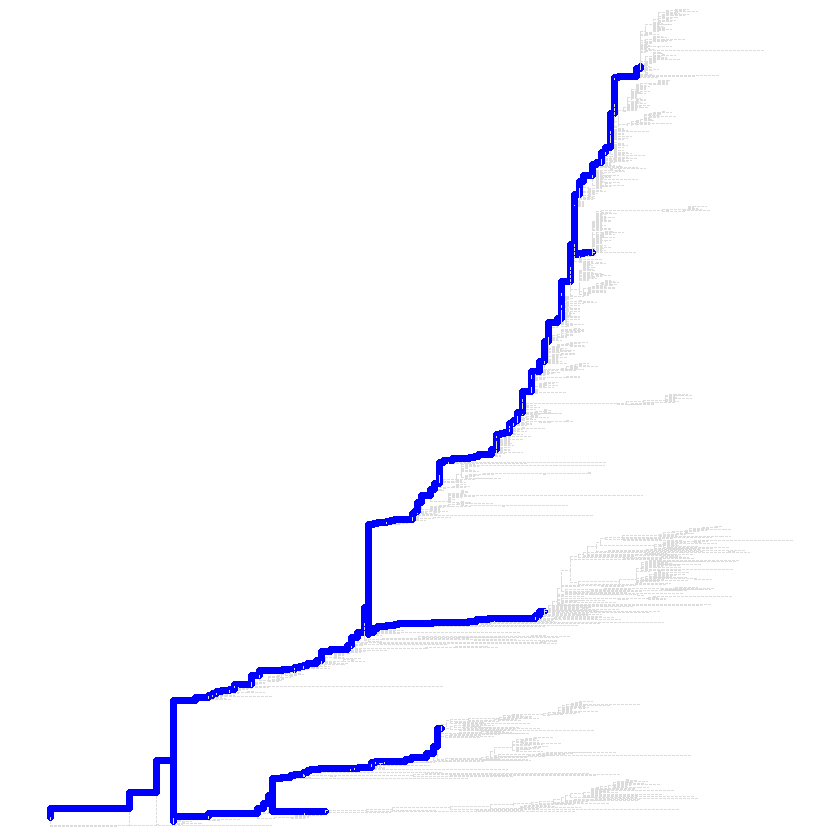

In [9]:
p <- plotSubPaths(paths, pathColor = "blue", branchSize = 0.2)
p

ggsave(
    filename = file.path(OUTPUT_DIR, "lineages.svg"),
    plot = p, 
    device = "svg",
    width = 3,
    height = 4.5
)

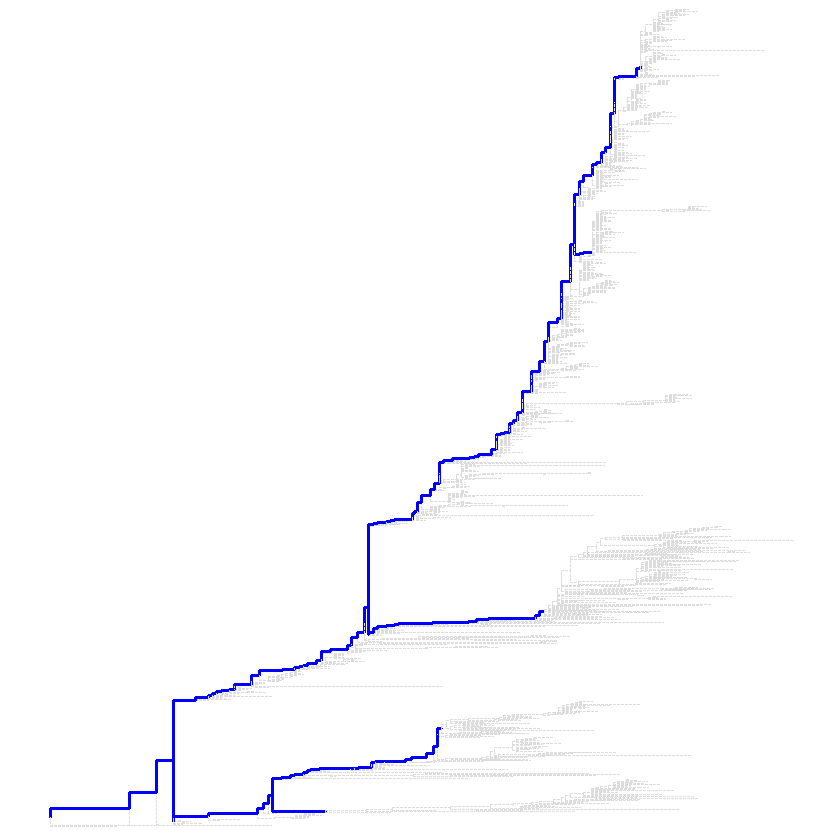

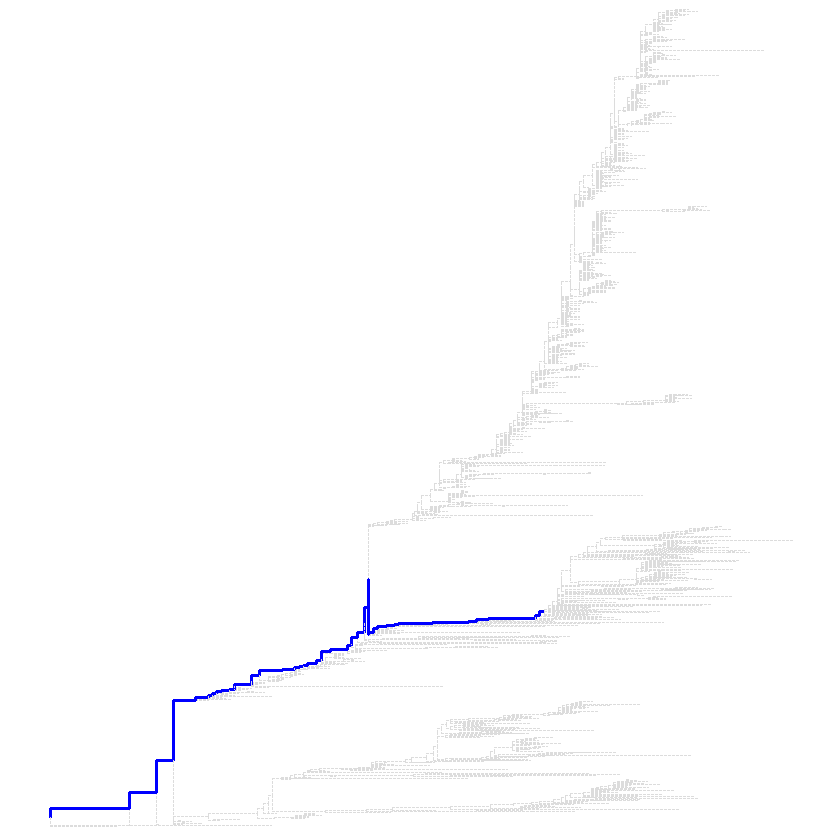

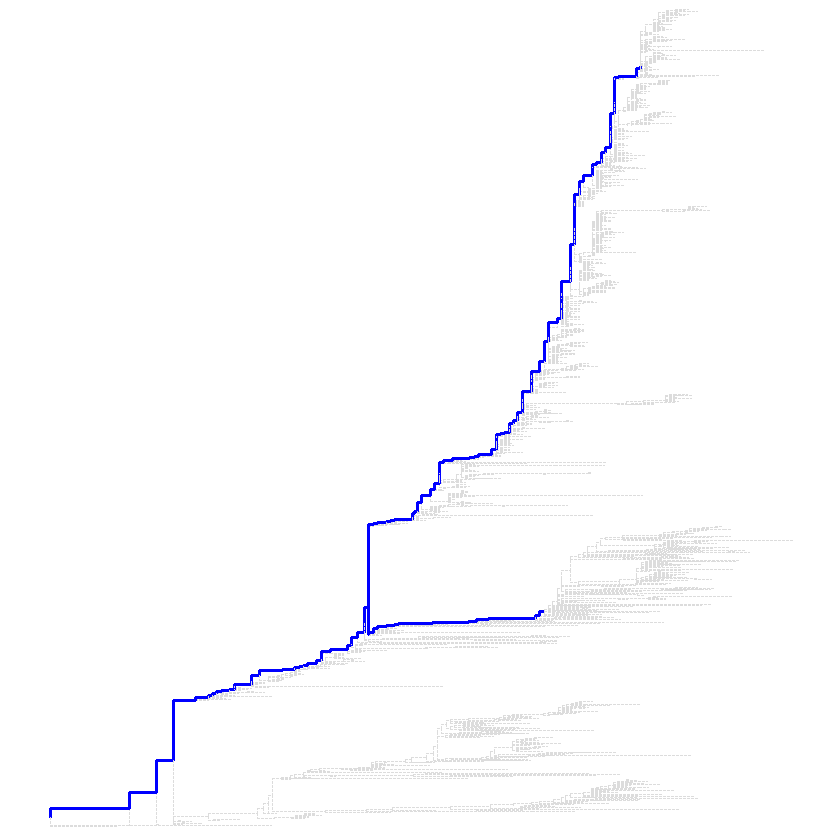

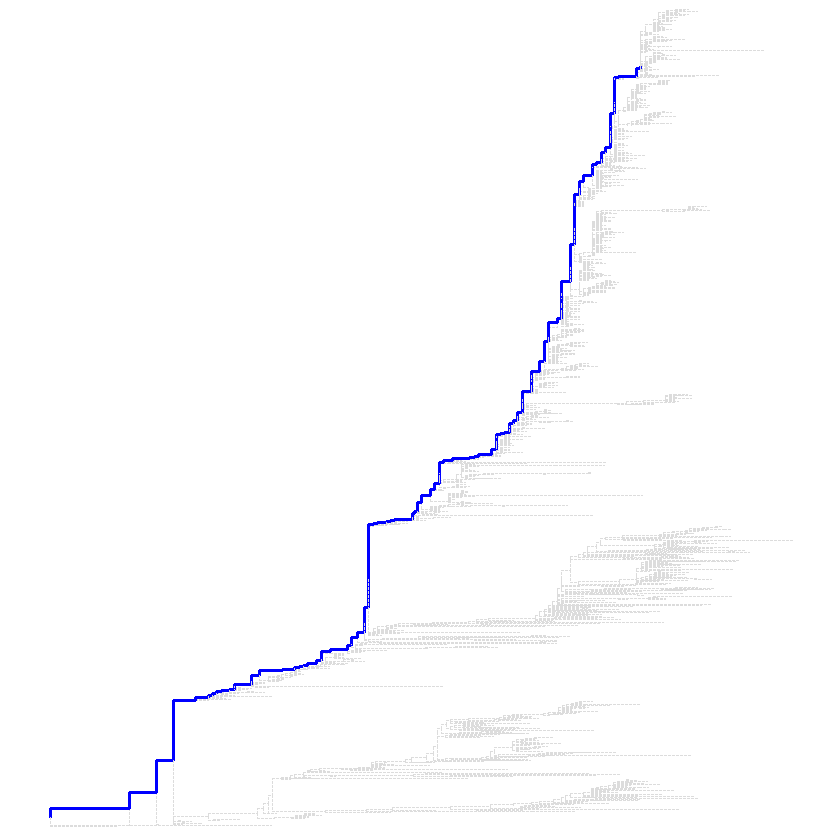

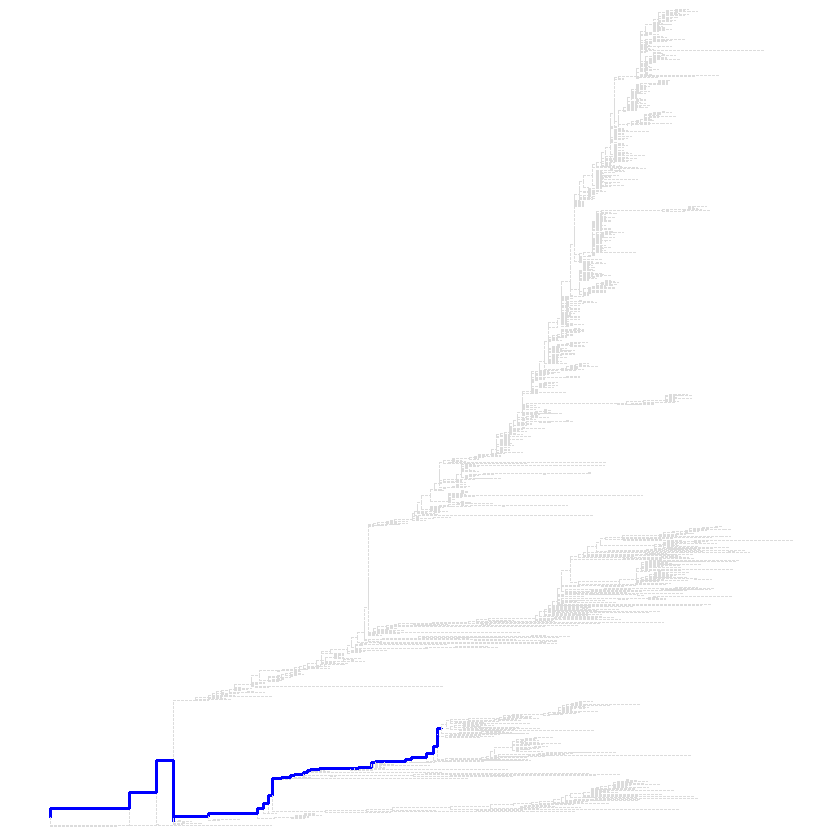

In [10]:
pathSelect <- list("0" = NULL, "1" = 1, "2" = c(1, 2), "3" = 2, "4" = 5)

for (n in names(pathSelect)) {
    p <- plotSubPaths(paths, select = pathSelect[[n]], pathColor = "blue", pathSize = 1, branchSize = 0.05)
    print(p)

    ggsave(
        filename = file.path(OUTPUT_DIR, paste0("pathway", n, ".svg")),
        plot = p, 
        device = "svg",
        width = 1,
        height = 1.3
    )
}

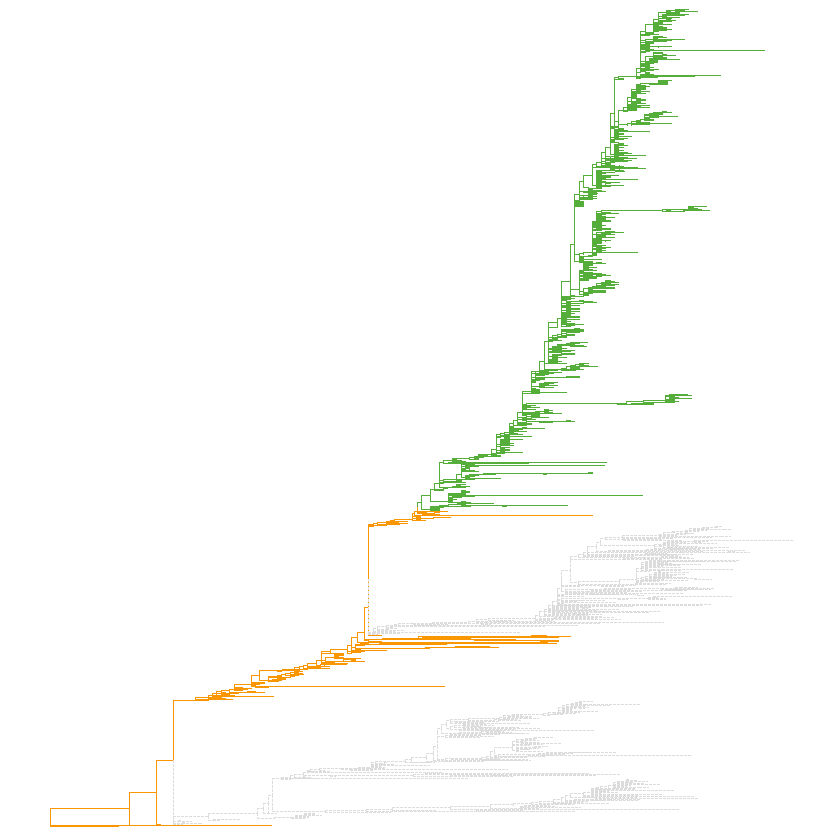

In [11]:
p <- plot(extractSite(mutations, 211)) +
    ggtitle(label = NULL, subtitle = NULL) + 
    theme(legend.position = "none")
p

ggsave(
    filename = file.path(OUTPUT_DIR, "singleFixation.svg"),
    plot = p, 
    device = "svg",
    width = 1.5,
    height = 2
)

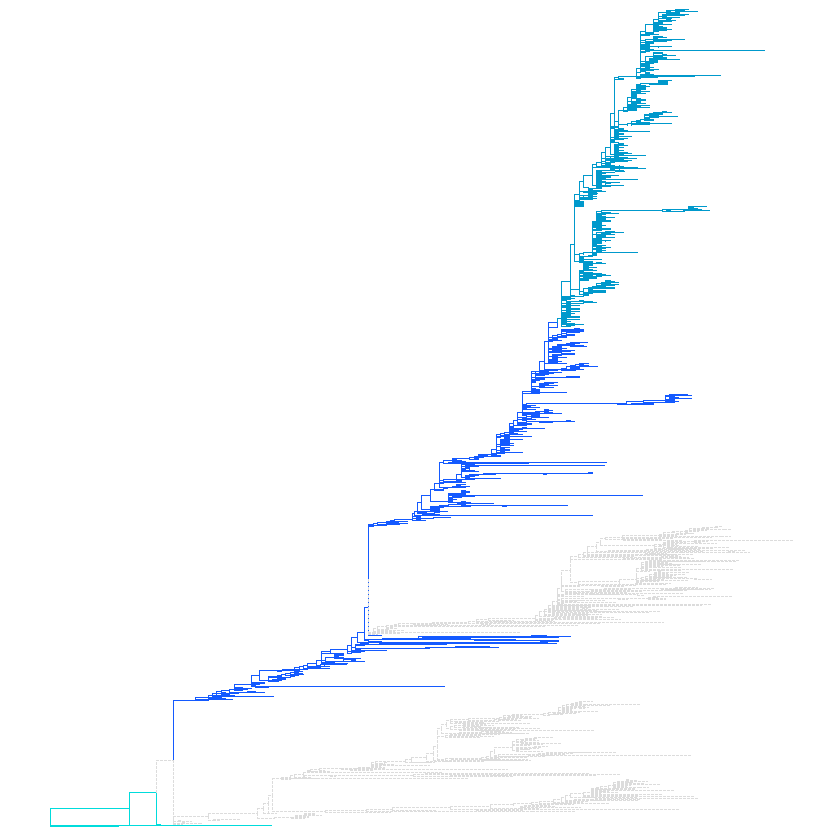

In [12]:
p <- plot(extractSite(mutations, 192), select = 3) + 
    ggtitle(label = NULL, subtitle = NULL) + 
    theme(legend.position = "none")
p

ggsave(
    filename = file.path(OUTPUT_DIR, "multiFixation.svg"),
    plot = p, 
    device = "svg",
    width = 1.5,
    height = 2
)

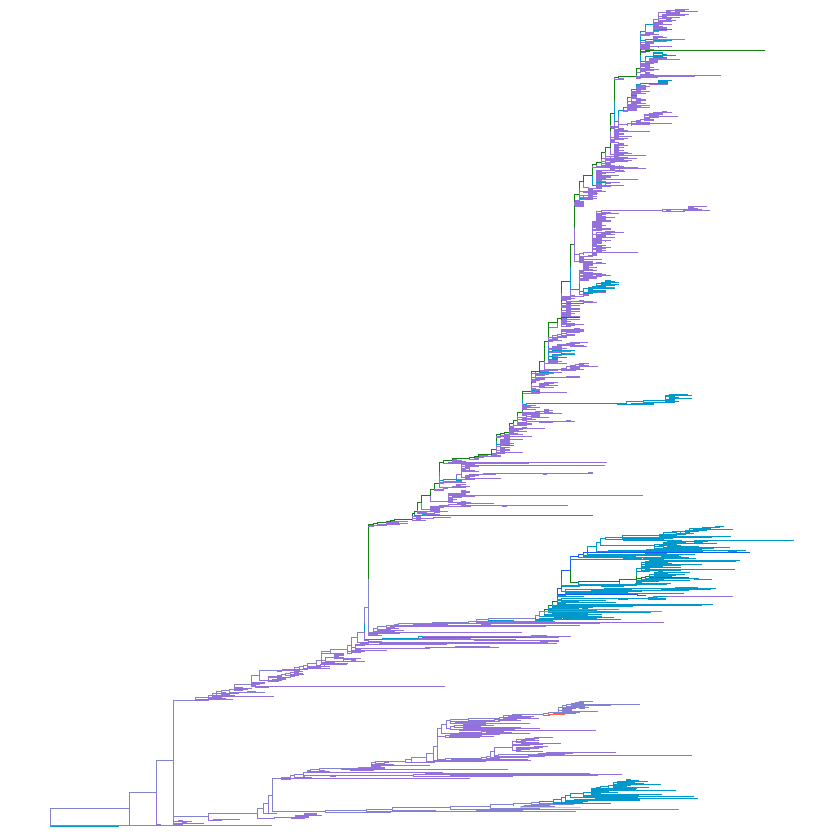

In [13]:
p <- plotSingleSite(paths, 280, showPath = FALSE) +
    ggtitle(label = NULL, subtitle = NULL) + 
    theme(legend.position = "none")
p

ggsave(
    filename = file.path(OUTPUT_DIR, "parallelMutation.svg"),
    plot = p, 
    device = "svg",
    width = 1.5,
    height = 2
)

In [14]:
pdf(file = file.path(OUTPUT_DIR, "sneakPeek.pdf"))
sp <- sneakPeek(paths)
invisible(dev.off())

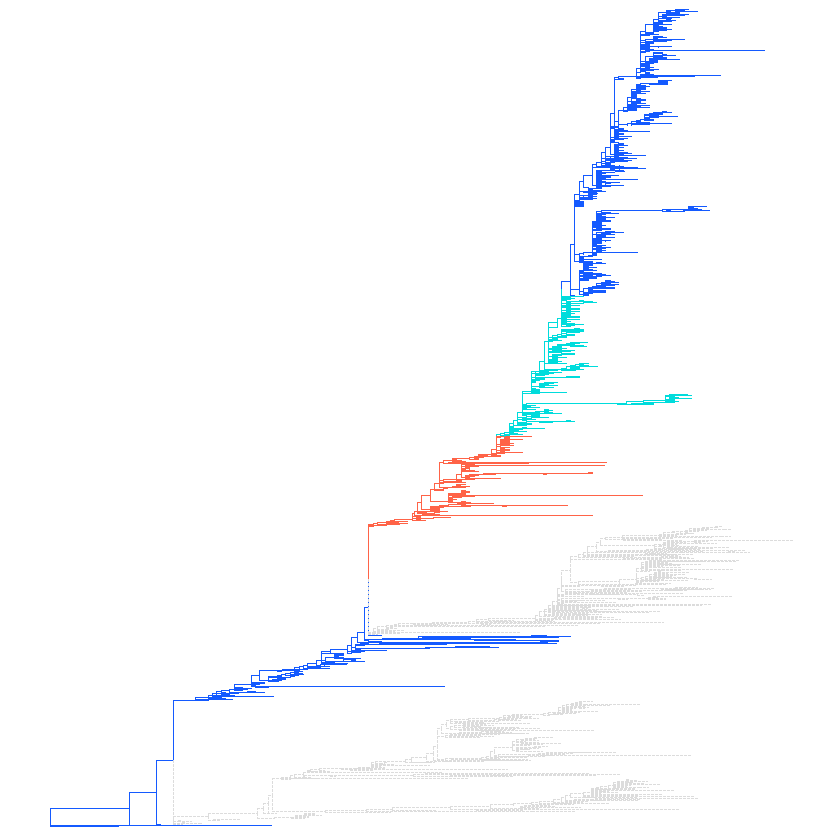

In [20]:
p <- plot(extractSite(mutations, 208), select = 3) + 
    ggtitle(label = NULL, subtitle = NULL) +
    theme(legend.position = "none")
p

ggsave(
    filename = file.path(OUTPUT_DIR, "minEntropy.svg"),
    plot = p, 
    device = "svg",
    width = 1,
    height = 1 * TREE_HEIGHT_RATIO
)

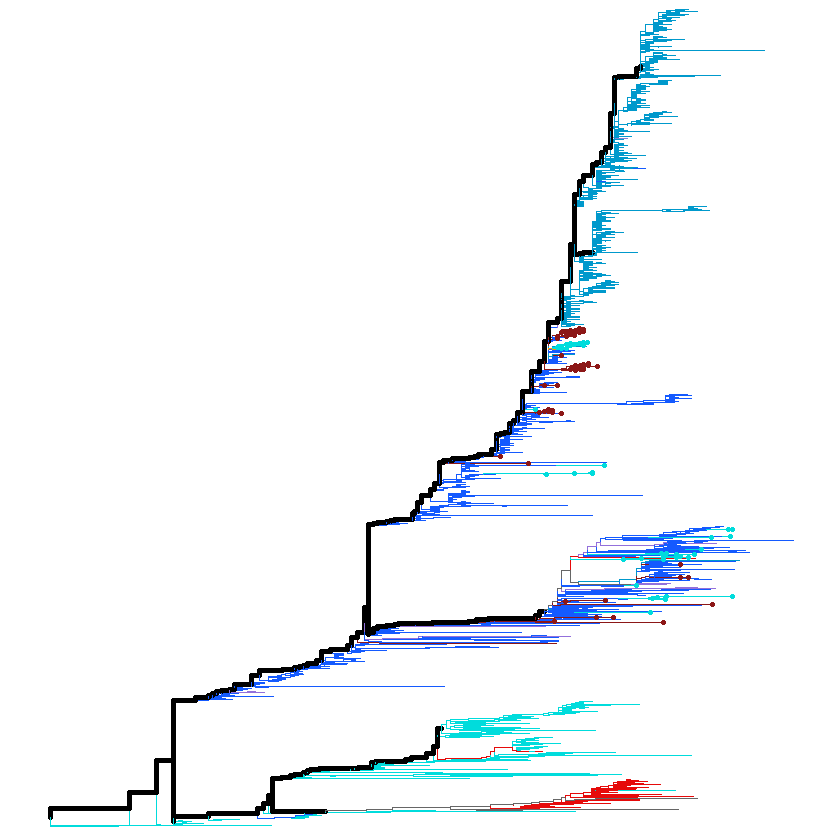

In [16]:
p <- plotSingleSite(paraSites, 192, showPath = TRUE) + 
    ggtitle(label = NULL, subtitle = NULL) +
    theme(legend.position = "none")
p

ggsave(
    filename = file.path(OUTPUT_DIR, "mutations.svg"),
    plot = p, 
    device = "svg",
    width = 3.5,
    height = 3.5 * TREE_HEIGHT_RATIO
)

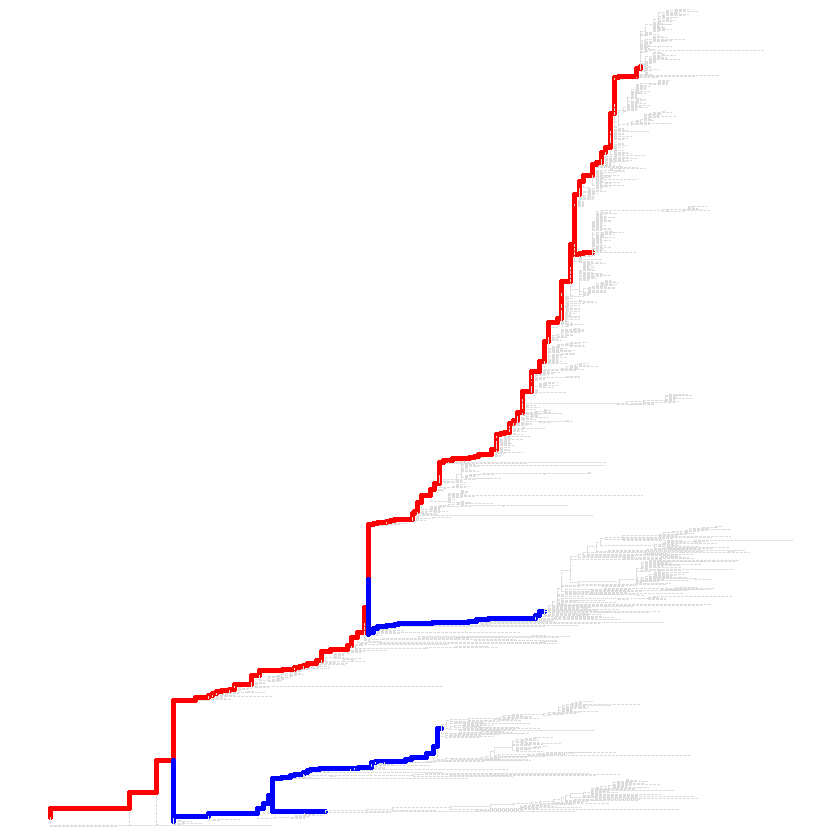

In [17]:
select1 <- c(2, 4)

p <- plotPathsComparison(paths, select1, seq_along(paths)[-select1], pathSize = 1.5, branchSize = 0.5)
p

ggsave(
    filename = file.path(OUTPUT_DIR, "pathComparison0.svg"),
    plot = p, 
    device = "svg",
    width = 3.5,
    height = 3.5 * TREE_HEIGHT_RATIO
)

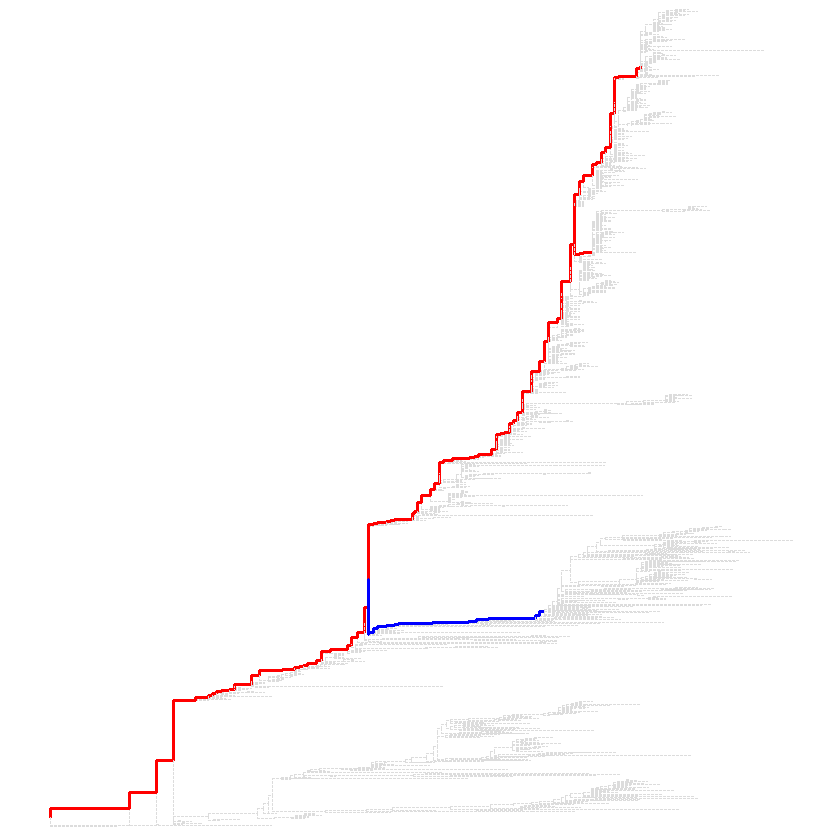

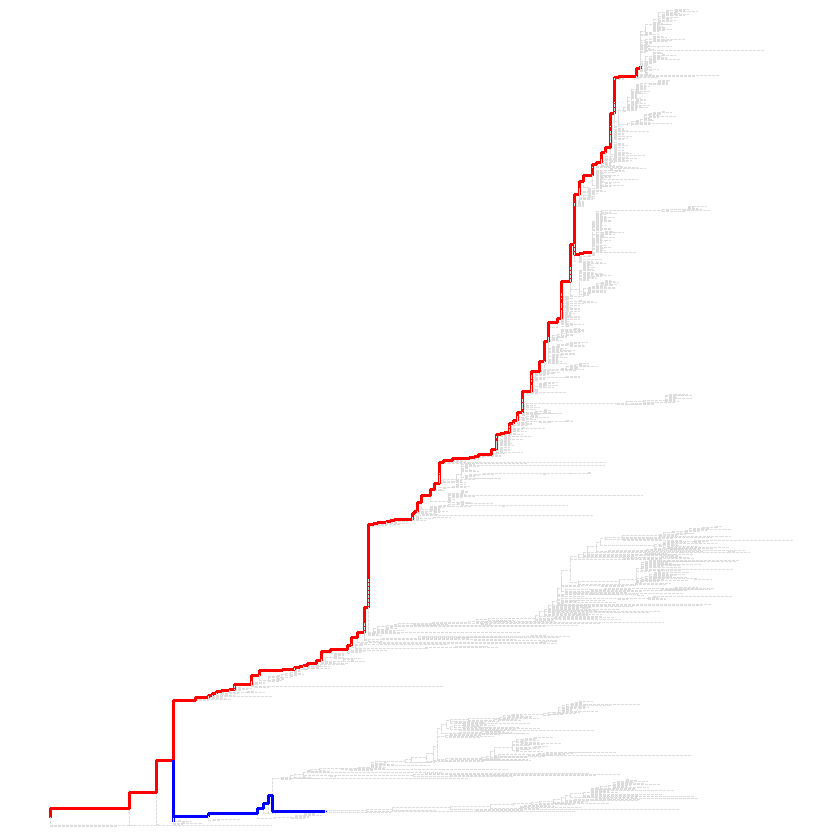

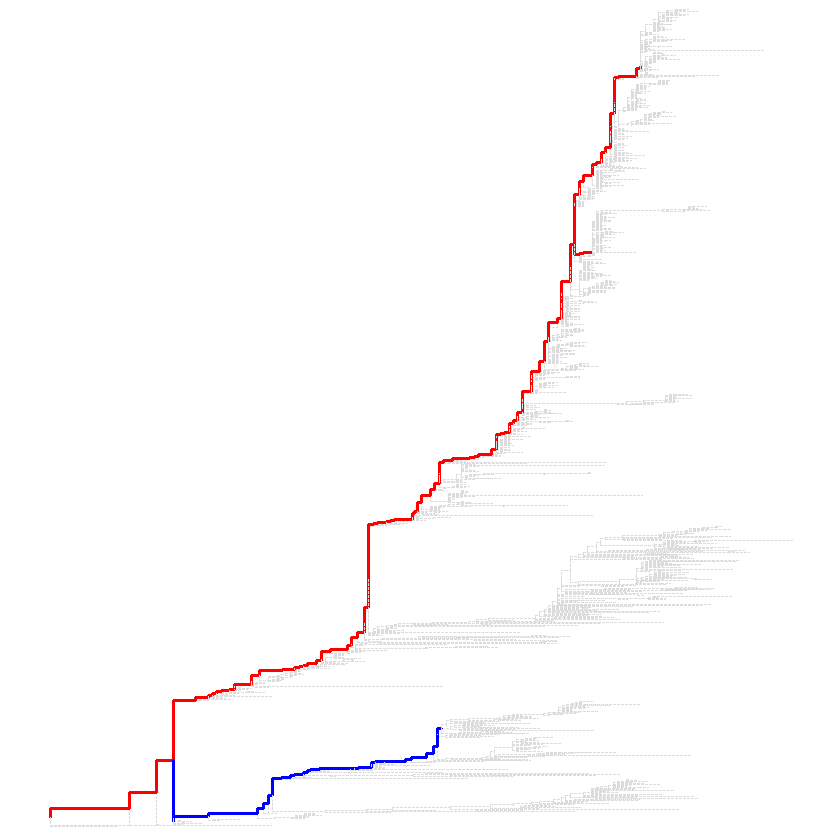

In [18]:
n <- 0

for (select2 in seq_along(paths)[-select1]) {
    n <- n + 1
    p <- plotPathsComparison(paths, select1, select2, 1, 0.05)
    print(p)
    ggsave(
        filename = file.path(OUTPUT_DIR, paste0("pathComparison", n, ".svg")),
        plot = p, 
        device = "svg",
        width = 1,
        height = 1 * TREE_HEIGHT_RATIO
    )
}

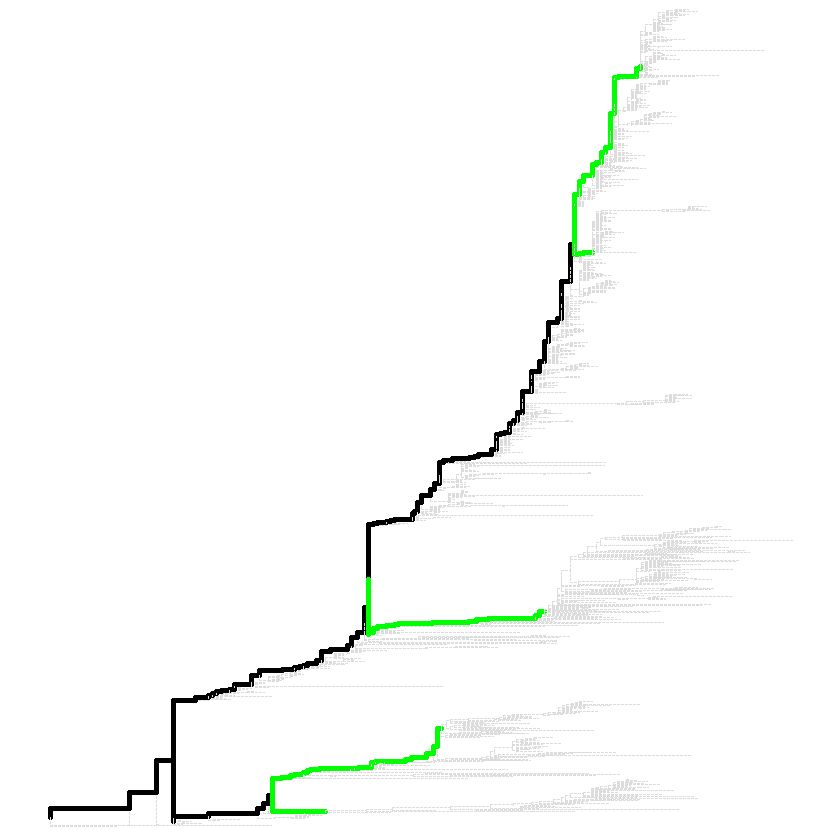

In [19]:
allPathNodes <- table(unlist(paths))
mostRecentNodes <- as.integer(names(which(allPathNodes == 1)))

pathNodes <- unique(unlist(paths))

group <- rep(1, times = nNodes)
group[pathNodes] <- 0
group <- factor(group)

groupColors <- rep(2, times = nNodes)
groupColors[pathNodes] <- 1
groupColors[mostRecentNodes] <- 0
groupColors <- factor(groupColors)

size <- rep(1, times = nNodes)
size[pathNodes] <- 2

p <- ggtree(tree, aes(color=groupColors, linetype=group, size=size)) + 
    scale_size(range=c(0.5, 1.5)) +
    scale_color_manual(values = c("green", "black", "gainsboro")) + 
    theme(legend.position = "none")
p

ggsave(
    filename = file.path(OUTPUT_DIR, "parallelity.svg"),
    plot = p, 
    device = "svg",
    width = 3.5,
    height = 3.5 * TREE_HEIGHT_RATIO
)